## **Employability Prediction**

Identifying the different factors that contribute to employability can help those 1.) seeking to gain employment: so they would know and be able to work on their weaknesses and strengths 2.) employers: so they could objectively assess prospective employees, aiding the hiring process 3.) educational institutions: so they can adjust and align with the demands of the labor market. More than identifying these factors individually, the combination of quantified different factors can be taken advantaged of in predicting employability. If those combinations (quantified using a rating system) that lead to employability can be learned through models with reasonable accuracy, any future rating of these factors can result to quick predictions.

The objective of this study is to explore the application of different classification models to a Philippines mock job interview results dataset (where an interviewee is rated with different factors and labeled as either employable or less employable) and evaluate the models using performance metrics.

### **Importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Reading file
df = pd.read_excel('employability.xlsx')

In [5]:
# Check dataframe
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [6]:
# Drop student name
df = df.drop(['Name of Student'], axis=1)

In [7]:
# Check data type
df.dtypes

GENERAL APPEARANCE             int64
MANNER OF SPEAKING             int64
PHYSICAL CONDITION             int64
MENTAL ALERTNESS               int64
SELF-CONFIDENCE                int64
ABILITY TO PRESENT IDEAS       int64
COMMUNICATION SKILLS           int64
Student Performance Rating     int64
CLASS                         object
dtype: object

In [8]:
# Checking for missing data
print("Total missing data")
df.isnull().sum()

Total missing data


GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [9]:
# Check classes (Note: we are dealing with binary classification)
df.CLASS.unique()

array(['Employable', 'LessEmployable'], dtype=object)

#### **Summary Statistics**

In [11]:
df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### **Feature Distribution**

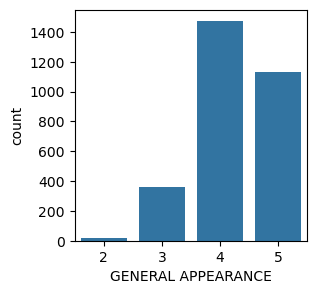

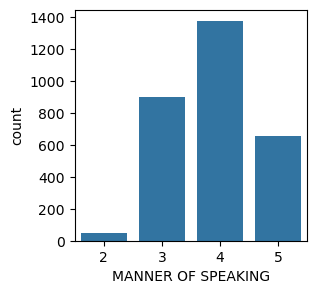

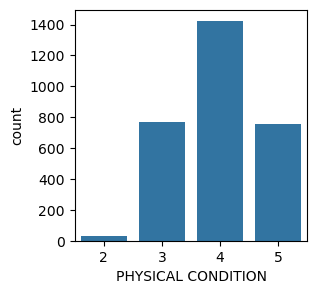

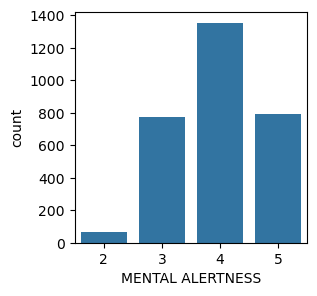

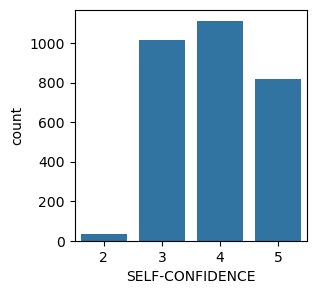

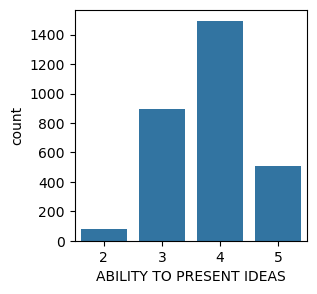

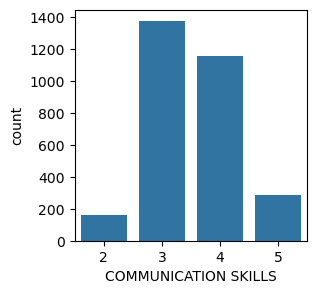

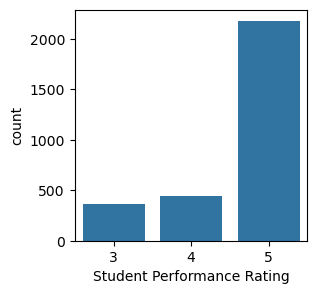

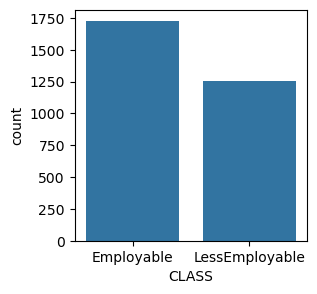

In [13]:
# Check feature distribution
for feature in df.columns:
    plt.figure(figsize=(3,3))
    sns.countplot(df, x=feature)
    plt.show()

### **Preprocessing**

In [15]:
# One hot encoding of target variable
df['CLASS'] = [1 if i == 'Employable' else 0 for i in df['CLASS']]

In [16]:
df.dtypes

GENERAL APPEARANCE            int64
MANNER OF SPEAKING            int64
PHYSICAL CONDITION            int64
MENTAL ALERTNESS              int64
SELF-CONFIDENCE               int64
ABILITY TO PRESENT IDEAS      int64
COMMUNICATION SKILLS          int64
Student Performance Rating    int64
CLASS                         int64
dtype: object

### **Data Splitting**

In [18]:
# Split dataframe to X and y (feature and target)
X = df.iloc[:,0:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

### **Correlation Matrix**

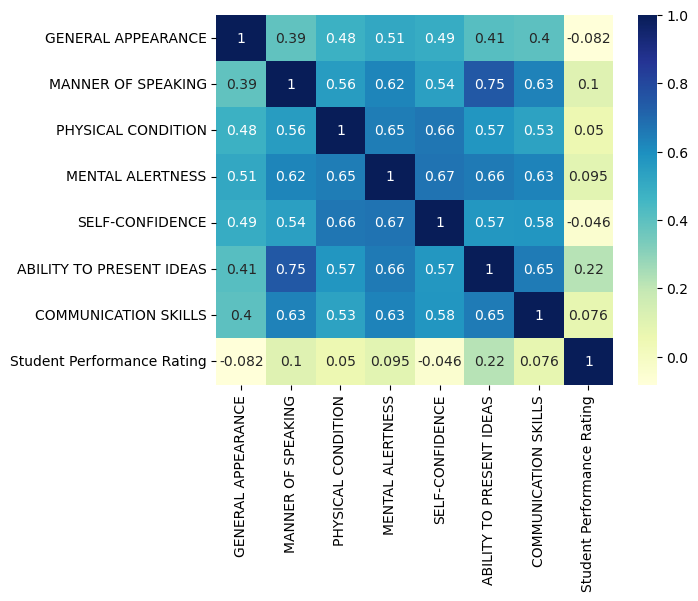

In [20]:
# Plotting correlation heatmap 
sns.heatmap(df.iloc[:,0:-1].corr(method='spearman'), cmap="YlGnBu", annot=True) 
plt.show() 

**Features that are highly correlated:**

1.) Manner of speaking and ability to present ideas (r = .75)\
Excluding the Student performance rating, every feature is mostly moderately correlated (.6 > |r| > .4) to each other.

### **Mutual Information**

Mutual information is used to quantify the dependecy of the features with the target variable Class. All features have low MI close to 0. Since the absolute difference among the features is small, all features will be kept for modeling.

<Axes: ylabel='feature'>

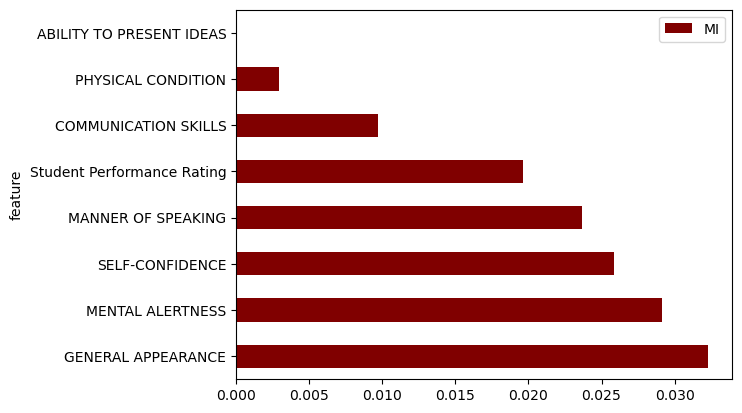

In [24]:
mutual_info = mutual_info_classif(X, y)
mi_data = {"feature" : df.columns[:-1],
            "MI" : mutual_info}
mi_df = pd.DataFrame(mi_data).sort_values(by=['MI'], ascending=False).set_index('feature')
mi_df.plot(kind='barh', color='maroon') 

### **Data Splitting**

In [26]:
# Split into (training/validation)/test set (60/20/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Checking shape
print("Number of examples for each set")
print("")
print(f"Training/Validation set: {X_train.shape[0]}")
print(f"Testing set: {X_test.shape[0]}")

Number of examples for each set

Training/Validation set: 2385
Testing set: 597


### **Model Training**

In [28]:
# Initialization
models = {'Logistic Regression' : LogisticRegression(random_state=0),
         'Decision Tree' : tree.DecisionTreeClassifier(),
         'Random Forest' : RandomForestClassifier(random_state=0),
         'Gradient Boost' : GradientBoostingClassifier(random_state=0),
         'XGBoost' : XGBClassifier(objective="reg:squarederror", random_state=0, verbosity=0)}

In [29]:
# Training model and evaluating using 10 fold - cross validation

df_val = pd.DataFrame(columns=['Model','Score']) # Dataframe containing model score

for model in models:
    
    models[model].fit(X_train, y_train)
    
    # create a new row
    new_row = {'Model': model, 'Score': cross_val_score(models[model], X_train, y_train, cv=10).mean()}

    # append the new row to the DataFrame
    df_val = df_val._append(new_row, ignore_index=True)
    
df_val

,Model,Score
0,Logistic Regression,0.597488
1,Decision Tree,0.900206
2,Random Forest,0.900624
3,Gradient Boost,0.811749
4,XGBoost,0.900204


### **Model Evaluation**

In [31]:
# Evaluating using test data

df_test = pd.DataFrame(columns=['Model','Score']) # Dataframe containing model score

for model in models:
    
    # create a new row
    new_row = {'Model': model, 'Score': models[model].score(X_test, y_test)}

    # append the new row to the DataFrame
    df_test = df_test._append(new_row, ignore_index=True)

df_test

,Model,Score
0,Logistic Regression,0.606365
1,Decision Tree,0.899497
2,Random Forest,0.899497
3,Gradient Boost,0.822446
4,XGBoost,0.899497


**Confusion Matrix**

Logistic Regression
Accuracy: 0.6063651591289783
Sensitivity: 0.7879656160458453
Specificity: 0.35080645161290325


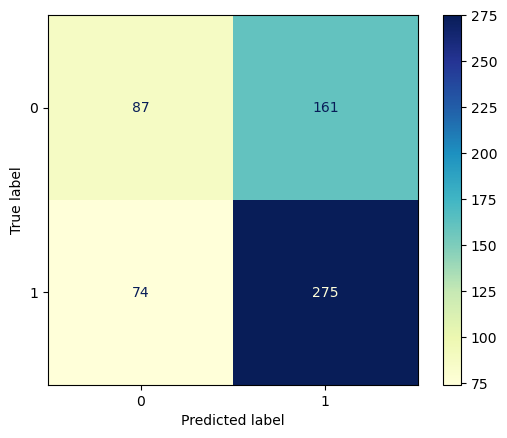

Decision Tree
Accuracy: 0.8994974874371859
Sensitivity: 0.9226361031518625
Specificity: 0.8669354838709677


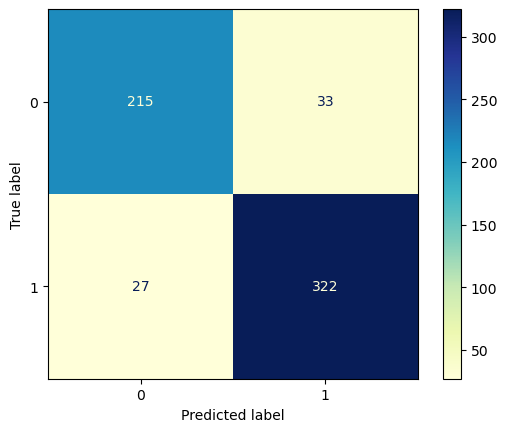

Random Forest
Accuracy: 0.8994974874371859
Sensitivity: 0.9312320916905444
Specificity: 0.8548387096774194


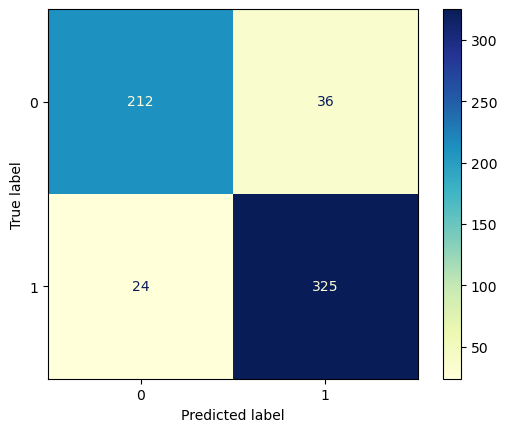

Gradient Boost
Accuracy: 0.8224455611390284
Sensitivity: 0.8825214899713467
Specificity: 0.7379032258064516


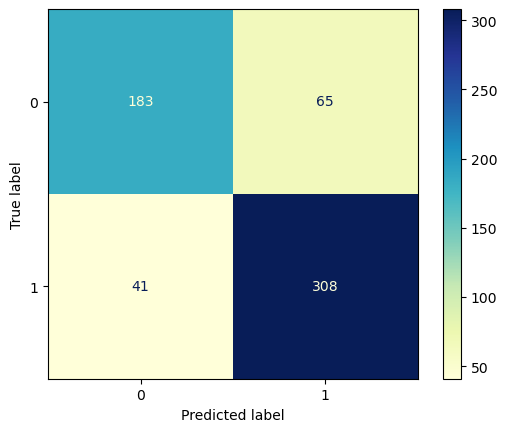

XGBoost
Accuracy: 0.8994974874371859
Sensitivity: 0.9226361031518625
Specificity: 0.8669354838709677


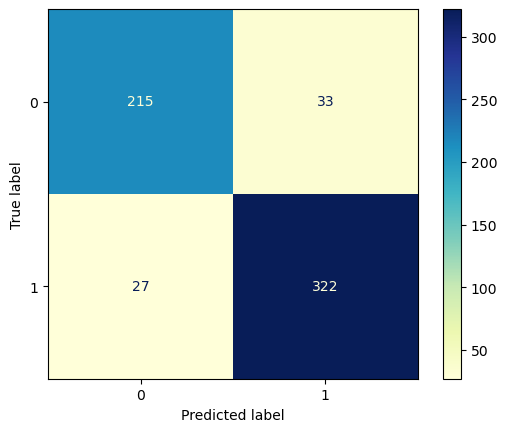

In [33]:
for model in models:
    
    print(model)
    
    cm = confusion_matrix(y_test, models[model].predict(X_test))

    FP = cm[0][1] # False positive
    FN = cm[1][0] # False negative
    TP = cm[1][1] # True positive
    TN = cm[0][0] # True negative
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=models[model].classes_)
    
    disp.plot(cmap = "YlGnBu")
    
    # Evaluation metrics
    print(f"Accuracy: {(TP+TN) / (TP+TN+FP+FN)}")
    print(f"Sensitivity: {TP / (TP+FN)}") # True positive rate
    print(f"Specificity: {TN/(TN+FP)}") # True negative rate
    # print(f"Precision: {TP / ( TP+FP )}") # Positive predictive value
    # print(f"Negative Predictive Value: {TN/(TN+FN)}") # Positive predictive value


    plt.show()

### **Conclusion**

Decision tree and ensemble learning methods (specifically Random Forest, XGBoost) yielded an accuracy of close to .9, therefore it is recommended to use such models if determining employability based on the given (job interview) assessment. 

Due to the presence of false positives and false negatives in the model, the primary use case of this assessment is only recommended for quick evaluation of employability status rather than basis of hiring decisions (especially if there's high risk in hiring false positives). Also, using these or similar assessments can be useful for rapidly filtering out true negatives (at the expense of few false negatives).